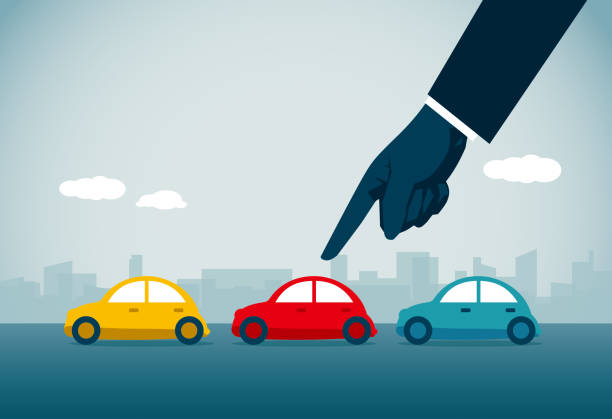
[Image Source](https://www.istockphoto.com/photos/choose-car)

# Group 6 SC1015 Assignment


#### __Buying a car in Singapore is infamous for its high cost, yet its every Singaporeans' dream to own one and avoid squeezing into public transport. So, this lead our team to formulate this question:__

> #### __How do we as a buyer, decide if a car purchase is worth it and get the biggest bang for our buck?__

<br>

* Dataset used [Webscraped data](https://github.com/xianjinseow92/Data-Science-Projects/blob/master/Project_2_SgCarMart%20Price%20Prediction/notebooks/sgcarmart_used_cars_prices.csv)<br>

Since a description of the data was not given. Let us list out the features and their details <br>
  - __Brand__
      * Brand of the vehicle [Toyota, BMW, etc..]
  - __Price__
      * Resale price of the car
  - __Depre value per year__
      * Annual decpreciation of the vehicle
  - __Mileage KM__
      * How much mileage the car has done
  - __Manufactured Year__
      * The year which the vehicle was manufactured
  - __Road tax per year__
      * Paid on a yearly basis, calculated based on engine capacity.
  - __Transimission Type__
      * The way power is transmitted from an engine to the axle in the vehicle [Automatic, Manual]
  - __Dereg Value from scraped date__
      * The value the owner will recieve from the government upon deregistering the vehicle for use in Singapore.
  - __OMV__
      * Open Market Value. 
  - __ARF__
      * Addition registration fee
  - __COE__
      * Listed COE value when the vehicle is first registered
  - __Days of COE left__
      * Self Explanatory
  - __Engine capacity__
      * How much CC the engine has. [2L ~ 2000CC]
  - __Curb weight__
      * Total mass of the car when not loaded
  - __No. of owners__
      * How many total owners / ownned the car
  - __Vehicle Type__
      * Luxury/ Sedan/ coupe... etc
    

Find Link to Sections here <br>
   - [1. Import Libraries](#Importing)
   - [2. Data Extraction](#Data)
   - [3. Checking Data](#Check_Data)
   - [4. Performing EDA](#EDA)
   - [5. Modeling](#Modeling)
   - [6. Conclusion](#Conclusion)

<hr>

# 1. Import Libraries

> Importing libraries for Exploratory Data Analysis and Machine Learning 

<a id = "Importing"></a>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import statsmodels.api as ssm

<hr>

# 2. Data Extraction 

<a id = "Data"></a>

In [42]:
data = pd.read_csv('sgcarmart_used_cars_prices.csv', index_col = 0)

<hr>

# 3. Checking Data

> It is obvious that we need to "clean" our data, dropping non-informative and redundent columns. We should also take a look at the missing values in the data.

> Looking at the top 5 data from the data set, we can see that there are a few missing values [index_2] and redundent features such as [LISTING_URL]

<a id = "Check_Data"></a>

In [147]:
data.head()

,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
0,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,58800.0,5880.0,24-Oct-2009,81000.0,2008,978.0,Auto,NaN,23/10/2019,28040.0,28040.0,NaN,0.0,1799,1219.0,1.0,Mid-Sized Sedan
1,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,62800.0,6270.0,10-Nov-2009,106087.0,2009,1628.0,Auto,NaN,23/10/2019,33532.0,33532.0,NaN,0.0,2354,1680.0,3.0,MPV
2,https://www.sgcarmart.com/used_cars/info.php?I...,Austin,30000.0,16950.0,28-Sep-1972,NaN,1972,NaN,Manual,834.0,23/10/2019,NaN,NaN,4711.0,642.0,998,NaN,NaN,Others
3,https://www.sgcarmart.com/used_cars/info.php?I...,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,23/10/2019,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV
4,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23/10/2019,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV


In [44]:
# .info gives us a quick rundown of how many values are missing for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LISTING_URL                   3987 non-null   object 
 1   BRAND                         3987 non-null   object 
 2   PRICE                         3962 non-null   float64
 3   DEPRE_VALUE_PER_YEAR          3876 non-null   float64
 4   REG_DATE                      3987 non-null   object 
 5   MILEAGE_KM                    3338 non-null   float64
 6   MANUFACTURED_YEAR             3987 non-null   object 
 7   ROAD_TAX_PER_YEAR             3833 non-null   float64
 8   TRANSMISSION                  3987 non-null   object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  3221 non-null   float64
 10  SCRAPE_DATE                   3987 non-null   object 
 11  OMV                           3963 non-null   float64
 12  ARF                           3957 non-null   float64
 13  COE

> From this we can tell that there are a few missing values. We will just drop all the null values.

> We also assume that scrape date, listing URL and curb weight_kg is useless in our question. Therefore they will be dropped

In [45]:
data_clean = data.drop(['LISTING_URL', 'SCRAPE_DATE', 'CURB_WEIGHT_KG'], axis = 1)
data_clean.info()
data_clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         3987 non-null   object 
 1   PRICE                         3962 non-null   float64
 2   DEPRE_VALUE_PER_YEAR          3876 non-null   float64
 3   REG_DATE                      3987 non-null   object 
 4   MILEAGE_KM                    3338 non-null   float64
 5   MANUFACTURED_YEAR             3987 non-null   object 
 6   ROAD_TAX_PER_YEAR             3833 non-null   float64
 7   TRANSMISSION                  3987 non-null   object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  3221 non-null   float64
 9   OMV                           3963 non-null   float64
 10  ARF                           3957 non-null   float64
 11  COE_FROM_SCRAPE_DATE          3236 non-null   float64
 12  DAYS_OF_COE_LEFT              3963 non-null   float64
 13  ENG

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,NO_OF_OWNERS,VEHICLE_TYPE
0,Honda,58800.0,5880.0,24-Oct-2009,81000.0,2008,978.0,Auto,NaN,28040.0,28040.0,NaN,0.0,1799,1.0,Mid-Sized Sedan
1,Honda,62800.0,6270.0,10-Nov-2009,106087.0,2009,1628.0,Auto,NaN,33532.0,33532.0,NaN,0.0,2354,3.0,MPV
2,Austin,30000.0,16950.0,28-Sep-1972,NaN,1972,NaN,Manual,834.0,NaN,NaN,4711.0,642.0,998,NaN,Others
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,71379.0,71379.0,75889.0,761.0,2995,3.0,SUV
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23465.0,23465.0,39563.0,3503.0,1797,2.0,MPV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2.0,MPV
3983,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,Auto,85824.0,52051.0,65692.0,67901.0,1950.0,1796,2.0,Sports Car
3984,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,Auto,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1.0,Sports Car
3985,Nissan,81800.0,9900.0,05-Aug-2016,53339.0,2015,1786.0,Auto,60983.0,26629.0,29281.0,57501.0,2462.0,2488,1.0,Luxury Sedan


In [46]:
data_clean.dropna(inplace=True)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 3 to 3985
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         2612 non-null   object 
 1   PRICE                         2612 non-null   float64
 2   DEPRE_VALUE_PER_YEAR          2612 non-null   float64
 3   REG_DATE                      2612 non-null   object 
 4   MILEAGE_KM                    2612 non-null   float64
 5   MANUFACTURED_YEAR             2612 non-null   object 
 6   ROAD_TAX_PER_YEAR             2612 non-null   float64
 7   TRANSMISSION                  2612 non-null   object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  2612 non-null   float64
 9   OMV                           2612 non-null   float64
 10  ARF                           2612 non-null   float64
 11  COE_FROM_SCRAPE_DATE          2612 non-null   float64
 12  DAYS_OF_COE_LEFT              2612 non-null   float64
 13  ENG

> After our first round of data cleaning, we have 2612 rows of data left.

In [47]:
data_clean['TRANSMISSION'].value_counts()

Auto      2574
Manual      38
Name: TRANSMISSION, dtype: int64

In [48]:
data_clean.loc[data_clean['TRANSMISSION'] == 'Auto', 'TRANSMISSION'] = 1
data_clean.loc[data_clean['TRANSMISSION'] == 'Manual', 'TRANSMISSION'] = 0

In [128]:
data_clean['VEHICLE_TYPE'].value_counts()

Luxury Sedan       562
SUV                560
Mid-Sized Sedan    500
Hatchback          395
MPV                281
Sports Car         266
Stationwagon        48
Name: VEHICLE_TYPE, dtype: int64

In [129]:
data_clean.loc[data_clean['VEHICLE_TYPE'] == 'Luxury Sedan', 'VEHICLE_TYPE'] = 0
data_clean.loc[data_clean['VEHICLE_TYPE'] == 'SUV', 'VEHICLE_TYPE'] = 1
data_clean.loc[data_clean['VEHICLE_TYPE'] == 'Mid-Sized Sedan', 'VEHICLE_TYPE'] = 2
data_clean.loc[data_clean['VEHICLE_TYPE'] == 'Hatchback', 'VEHICLE_TYPE'] = 3
data_clean.loc[data_clean['VEHICLE_TYPE'] == 'MPV', 'VEHICLE_TYPE'] = 4
data_clean.loc[data_clean['VEHICLE_TYPE'] == 'Sports Car', 'VEHICLE_TYPE'] = 5
data_clean.loc[data_clean['VEHICLE_TYPE'] == 'Stationwagon', 'VEHICLE_TYPE'] = 6


> Change the transmission column into a categorical column with values 

In [49]:
data_clean['MANUFACTURED_YEAR'] = data_clean['MANUFACTURED_YEAR'].astype('int64')
data_clean['TRANSMISSION'] = data_clean['TRANSMISSION'].astype('int64')

In [50]:
for i in range(0,2612):
    reg_date = data_clean.iloc[i,3]
    reg_date_obj = datetime.strptime(reg_date, '%d-%b-%Y')
    day = reg_date_obj.day
    month = reg_date_obj.month
    year = reg_date_obj.year
    new_date = str(day) + '-' + str(month) + '-' + str(year)
    data_clean.iloc[i,3] = new_date

data_clean['REG_DATE'] = pd.to_datetime(data_clean['REG_DATE'], format = '%d-%m-%Y')

> Formatting the date

In [51]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 3 to 3985
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   BRAND                         2612 non-null   object        
 1   PRICE                         2612 non-null   float64       
 2   DEPRE_VALUE_PER_YEAR          2612 non-null   float64       
 3   REG_DATE                      2612 non-null   datetime64[ns]
 4   MILEAGE_KM                    2612 non-null   float64       
 5   MANUFACTURED_YEAR             2612 non-null   int64         
 6   ROAD_TAX_PER_YEAR             2612 non-null   float64       
 7   TRANSMISSION                  2612 non-null   int64         
 8   DEREG_VALUE_FROM_SCRAPE_DATE  2612 non-null   float64       
 9   OMV                           2612 non-null   float64       
 10  ARF                           2612 non-null   float64       
 11  COE_FROM_SCRAPE_DATE          

In [52]:
def age(data_clean):
    val = datetime.now() - data_clean['REG_DATE']
    val_in_s = val.total_seconds()
    val = divmod(val_in_s, 31536000.0)[0] + divmod(val_in_s, 31536000.0)[1]/100000000
    val = round(val, 2)
    return val

data_clean['Age'] = data_clean.apply(age, axis = 1)

In [53]:
def coe(data_clean):
    val = 'Yes'
    if(data_clean['Age']) < 10:
        val = 'No'
    
    return val

data_clean['Renewed'] = data_clean.apply(coe, axis = 1)

In [54]:
data_clean['BRAND'].value_counts()

Toyota           407
Mercedes-Benz    385
Honda            314
BMW              290
Mazda            139
Nissan           128
Audi             128
Volkswagen       107
Hyundai           79
Kia               78
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Jaguar            23
Citroen           22
Chevrolet         19
Renault           19
Maserati          18
Land              16
Infiniti          14
Ford              14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               4
Skoda              3
Jeep               3
Rolls-Royce        2
Daihatsu           2
Fiat               1
Proton             1
Lotus              1
Ssangyong          1
Aston              1
Alfa               1
Hummer             1
Name: BRAND, dtype: int64

<hr>

# 4. Performing EDA

<a id = "EDA"></a>

In [55]:
data_clean.describe()

# .describe() function is able to tell us a few details about our features

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,NO_OF_OWNERS,Age
count,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000
mean,92646.861026,12763.866769,64216.827335,2014.098775,1156.474732,0.985452,53661.999234,34770.233155,37070.564701,49822.720904,2206.182619,1881.039051,1.569296,6.950823
std,77305.109799,10428.923307,42634.974190,3.291559,889.936054,0.119758,34897.650282,36042.078619,46059.060462,16276.874723,820.285118,668.889629,0.962423,3.281812
min,9800.000000,3520.000000,3.000000,1992.000000,50.000000,0.000000,6653.000000,6510.000000,1316.000000,8501.000000,0.000000,658.000000,1.000000,2.160000
25%,57388.000000,8335.000000,33000.000000,2012.000000,684.000000,1.000000,38086.750000,18708.250000,14719.250000,39513.500000,1703.000000,1497.000000,1.000000,4.310000
50%,72800.000000,10450.000000,57000.000000,2015.000000,742.000000,1.000000,47876.000000,25671.000000,23979.000000,50889.000000,2340.000000,1598.000000,1.000000,6.070000
75%,105083.250000,13980.000000,88525.000000,2016.000000,1210.000000,1.000000,61015.250000,37015.750000,41016.000000,58190.000000,2772.000000,1998.000000,2.000000,9.102500
max,938000.000000,131070.000000,330000.000000,2019.000000,11550.000000,1.000000,423396.000000,487275.000000,536003.000000,97889.000000,3563.000000,6749.000000,6.000000,29.210000


> We can learn that the PRICE feature is greatly skewed to the right with most outliers lying on the right of the boxplots

PRICE    4.586479
dtype: float64

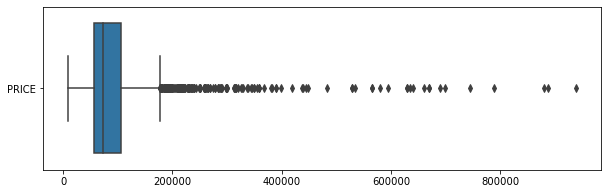

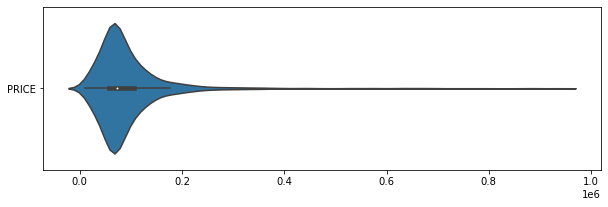

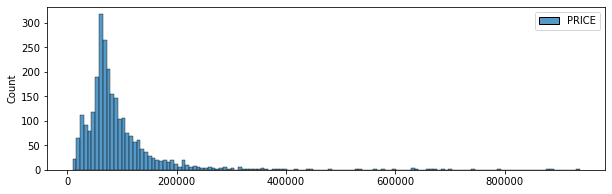

In [56]:
prices = pd.DataFrame(data_clean['PRICE'])

fig = plt.figure(figsize=(10,3))
sns.boxplot(data=prices, orient = "h")

fig = plt.figure(figsize=(10,3))
sns.violinplot(data=prices, orient = "h")

fig = plt.figure(figsize=(10,3))
sns.histplot(data=prices)

prices.skew()

> We can learn more from our data if we look at the correlation

### Outlier Analysis
#### From the above plots, we can see that the outliers are roughly around 200000 to 950000
#### From there, we will find the exact values of the lower bound and upper bound of the outliers

In [136]:
Q1=data_clean['PRICE'].quantile(0.25)
Q3=data_clean['PRICE'].quantile(0.75)
IQR = Q3-Q1
low_out = (Q3+1.5*IQR)
print ("The upper bound of the outlier is:",low_out)

upper_out = data_clean['PRICE'].max()
print ("The upper bound of the outlier is:",upper_out)

The upper bound of the outlier is: 176626.125
The upper bound of the outlier is: 938000.0


In [138]:
data_outliers = data_clean.loc[(data_clean['PRICE'] >= 176626.125) & (data_clean['PRICE'] <= 938000)]
data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 12 to 3882
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BRAND                 204 non-null    object        
 1   PRICE                 204 non-null    float64       
 2   REG_DATE              204 non-null    datetime64[ns]
 3   MILEAGE_KM            204 non-null    float64       
 4   TRANSMISSION          204 non-null    int64         
 5   OMV                   204 non-null    float64       
 6   COE_FROM_SCRAPE_DATE  204 non-null    float64       
 7   DAYS_OF_COE_LEFT      204 non-null    float64       
 8   ENGINE_CAPACITY_CC    204 non-null    int64         
 9   NO_OF_OWNERS          204 non-null    float64       
 10  VEHICLE_TYPE          204 non-null    object        
 11  Age                   204 non-null    float64       
 12  Renewed               204 non-null    object        
dtypes: datetime64[ns](

In [139]:
data_outliers['BRAND'].value_counts()

BMW              47
Mercedes-Benz    45
Porsche          35
Ferrari          11
Audi             10
Maserati          7
Bentley           6
Lamborghini       6
Lexus             5
Land              5
McLaren           5
Jaguar            4
Toyota            3
Ford              3
Jeep              2
Rolls-Royce       2
Volvo             2
Volkswagen        2
Aston             1
Infiniti          1
Nissan            1
Alfa              1
Name: BRAND, dtype: int64

In [140]:
data_clean.loc[data_clean['PRICE'] == 938000]

,BRAND,PRICE,REG_DATE,MILEAGE_KM,TRANSMISSION,OMV,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,NO_OF_OWNERS,VEHICLE_TYPE,Age,Renewed
1282,McLaren,938000.0,2018-02-03,7839.0,1,219614.0,44000.0,3010.0,3994,1.0,5,4.07,No


### Outlier Conclusion
#### By taking an in-depth look at the outlier, we can see that the Brands that make up a majority of the Outliers are BMW, Mercedes-Benz and Porsche
- Why is it so?
    > This might be due to the reputation of said brands as most household in Singapore know the brands, while others like Aston, Alfa and Jaguar are more foreign to Singaporeans.

- Extreme case, the 938000 Dollar McLaren 720s.
    > The reason why  the McLaren is absurdly expensive in Singapore is probably due to its limited status as not many McLaren 720s are produced worldwide. On top of that, the cost of owning a car in Singapore in additon to the COE required spiked the price of the McLaren up to 938000 Dollars even though the Open Market Value(OMV) of the car is only 219614 Dollars.

### Non-Outlier Analysis
#### Let's take a look at the data that are not Outliers and see how they compare to the Outliers

In [141]:
low_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)
print ("The lower bound of the non outlier data is:",low_bound)
print ("The upper bound of the non outlier data is:", upper_bound)

The lower bound of the non outlier data is: -14154.875
The upper bound of the non outlier data is: 176626.125


#### The calculation of the lower bound is a negative value, therefore there are no outliers in the lower quantile.

In [142]:
data_nonout = data_clean.loc[(data_clean['PRICE'] >= 0) & (data_clean['PRICE'] <= 176626.125)]
data_nonout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 3 to 3985
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BRAND                 2408 non-null   object        
 1   PRICE                 2408 non-null   float64       
 2   REG_DATE              2408 non-null   datetime64[ns]
 3   MILEAGE_KM            2408 non-null   float64       
 4   TRANSMISSION          2408 non-null   int64         
 5   OMV                   2408 non-null   float64       
 6   COE_FROM_SCRAPE_DATE  2408 non-null   float64       
 7   DAYS_OF_COE_LEFT      2408 non-null   float64       
 8   ENGINE_CAPACITY_CC    2408 non-null   int64         
 9   NO_OF_OWNERS          2408 non-null   float64       
 10  VEHICLE_TYPE          2408 non-null   object        
 11  Age                   2408 non-null   float64       
 12  Renewed               2408 non-null   object        
dtypes: datetime64[ns](

In [143]:
data_nonout['BRAND'].value_counts()

Toyota           404
Mercedes-Benz    340
Honda            314
BMW              243
Mazda            139
Nissan           127
Audi             118
Volkswagen       105
Hyundai           79
Kia               78
Volvo             61
Mitsubishi        58
Subaru            56
Lexus             44
MINI              40
Suzuki            33
Citroen           22
Renault           19
Chevrolet         19
Jaguar            19
Porsche           16
Infiniti          13
Peugeot           13
Land              11
Ford              11
Maserati          11
Opel               4
Skoda              3
Daihatsu           2
Jeep               1
Lotus              1
Proton             1
Hummer             1
Fiat               1
Ssangyong          1
Name: BRAND, dtype: int64

### Non-Outlier Conclusion
#### From the Non-Outlier data, we can see the brands that make up the majority of the cars have changed, more household names like Toyota Honda and Mazda have shown up even though Mercedez-Benz and BMWs are still seen.
- Why is it so?
    > From Toyota and Honda to BMW and Mercedes, these are all well known household brands when people talk about cars and automobiles. This can be the reason why the common 'more affordable' options are filled with cars from these brands.

> We can learn more from our data if we look at the correlation

In [57]:
data_clean.corr()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,NO_OF_OWNERS,Age
PRICE,1.000000,0.814537,-0.408120,0.302733,0.622449,0.053867,0.924002,0.799008,0.875741,0.179639,0.275363,0.626033,-0.093502,-0.318644
DEPRE_VALUE_PER_YEAR,0.814537,1.000000,-0.172620,0.032517,0.720043,0.042296,0.788607,0.904871,0.877188,0.334735,-0.134650,0.716833,0.098112,-0.039026
MILEAGE_KM,-0.408120,-0.172620,1.000000,-0.797943,0.004015,-0.141560,-0.400064,-0.109214,-0.129922,-0.075892,-0.550584,-0.000462,0.545436,0.805577
MANUFACTURED_YEAR,0.302733,0.032517,-0.797943,1.000000,-0.189885,0.210597,0.346485,-0.075205,-0.042590,0.160955,0.542300,-0.173754,-0.656713,-0.989812
ROAD_TAX_PER_YEAR,0.622449,0.720043,0.004015,-0.189885,1.000000,0.008521,0.593181,0.809103,0.799903,0.275927,-0.098242,0.972760,0.259264,0.178470
TRANSMISSION,0.053867,0.042296,-0.141560,0.210597,0.008521,1.000000,0.093940,0.034327,0.032830,0.118636,0.040870,0.011984,-0.147428,-0.204075
DEREG_VALUE_FROM_SCRAPE_DATE,0.924002,0.788607,-0.400064,0.346485,0.593181,0.093940,1.000000,0.765298,0.848661,0.412540,0.175230,0.612208,-0.170869,-0.366317
OMV,0.799008,0.904871,-0.109214,-0.075205,0.809103,0.034327,0.765298,1.000000,0.962432,0.289306,-0.074794,0.789063,0.202689,0.065047
ARF,0.875741,0.877188,-0.129922,-0.042590,0.799903,0.032830,0.848661,0.962432,1.000000,0.248315,-0.034025,0.793961,0.153235,0.027308
COE_FROM_SCRAPE_DATE,0.179639,0.334735,-0.075892,0.160955,0.275927,0.118636,0.412540,0.289306,0.248315,1.000000,-0.296650,0.292019,-0.149406,-0.171227


> Since want to see the correlaton between price and other features. We can make use of a heatmap to easily display the correlation values. We make use of mask to hide the other duplicated features.

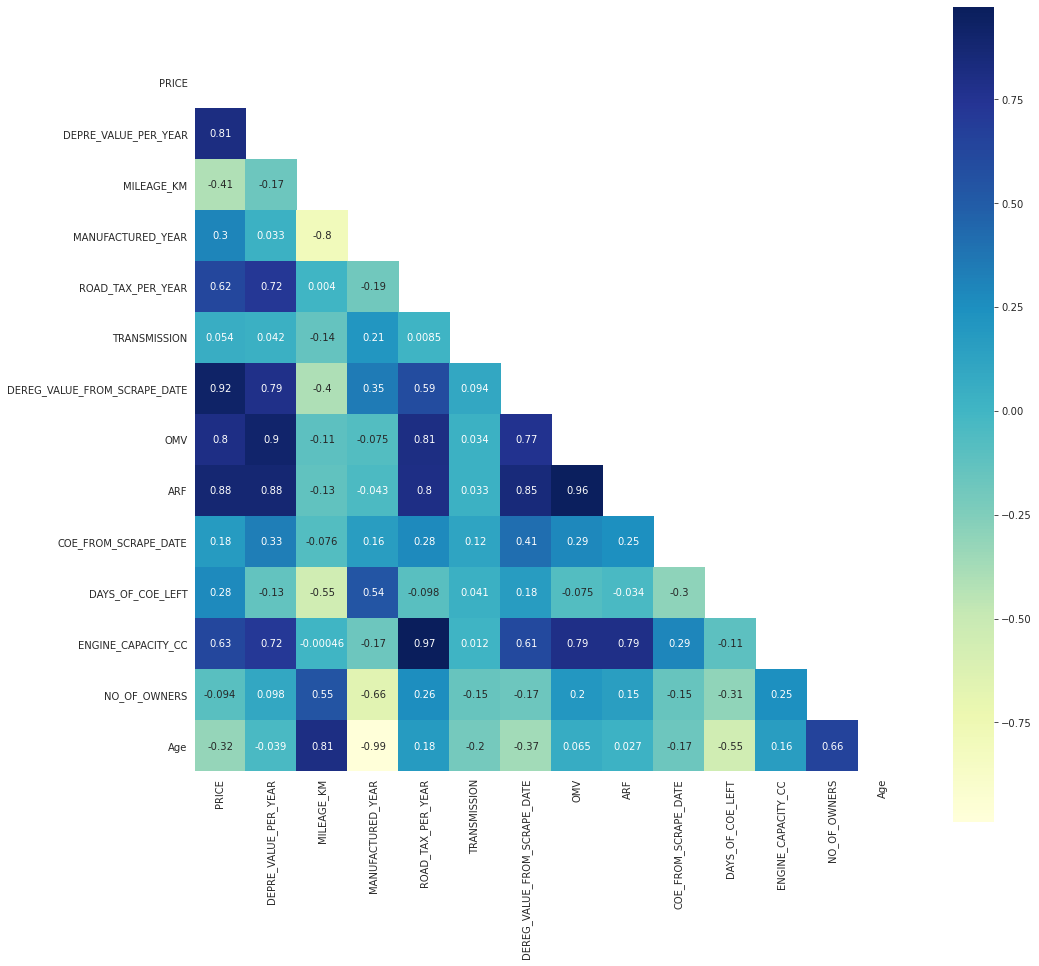

In [58]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

mask = np.zeros_like(data_clean.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(16,15))
    sns.heatmap(data_clean.corr(), annot=True, square=True, center=0, mask=mask, cmap="YlGnBu", ax=ax)

> From this we learn that other features, have considerably high correlation with each other as well. Lets take a look!
>> OMV & DEPRE_VALUE_PER_YEAR has a strong correlation of 0.90 <br>
>> OMV & ARF has a strong correlation of 0.96 <br>
>> ENGINE_CAPACITY_CC & ROAD_TAX_PER_YEAR has a strong correlation of 0.97 <br>
>> MANUFACTURED YEAR & AGE has an almost perfect correlation of -0.99 <br><br>
> What is happening here can be described as [MultiCollinearity](https://www.google.com/search?q=multicollinearity&rlz=1C1ONGR_enSG975SG975&oq=multico&aqs=chrome.1.69i57j0i131i433i512j0i512l6j46i175i199i512j0i512.5301j0j7&sourceid=chrome&ie=UTF-8) <br><br>
>Simply put!



>And it is not a surprise that we encounter this problem too! So to counter this issue, we just have to drop either of the values!



In [ ]:
data_clean.drop(['ARF','DEPRE_VALUE_PER_YEAR','ROAD_TAX_PER_YEAR','MANUFACTURED_YEAR','DEREG_VALUE_FROM_SCRAPE_DATE'],axis=1, inplace=True)
data_clean.info()

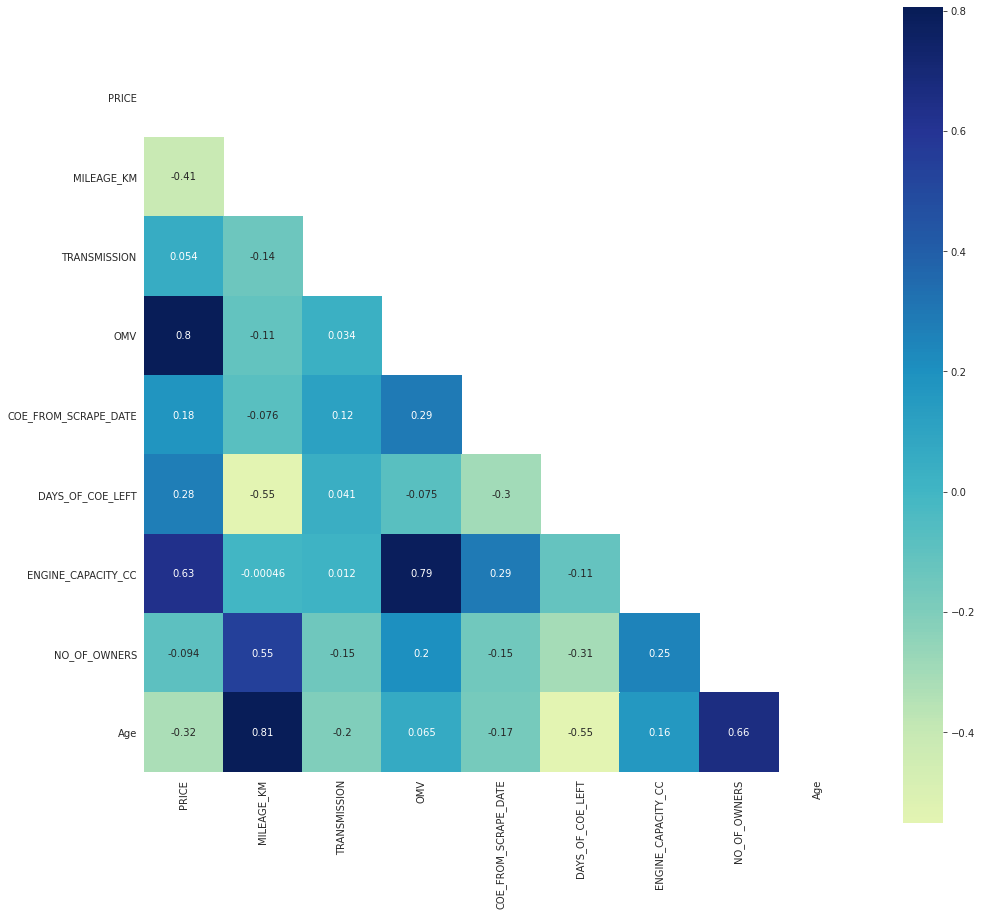

In [160]:
mask = np.zeros_like(data_clean.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(16,15))
    sns.heatmap(data_clean.corr(), annot=True, square=True, center=0, mask=mask, cmap="YlGnBu", ax=ax)

In [161]:
data_clean.corr()['PRICE'].sort_values(ascending = False)

PRICE                   1.000000
OMV                     0.799008
ENGINE_CAPACITY_CC      0.626033
DAYS_OF_COE_LEFT        0.275363
COE_FROM_SCRAPE_DATE    0.179639
TRANSMISSION            0.053867
NO_OF_OWNERS           -0.093502
Age                    -0.318644
MILEAGE_KM             -0.408120
Name: PRICE, dtype: float64

> We can now note the features and their correlation to the price!
>> 1) __OMV__ has a strong correlation of 0.8 <br>
>> 2) __ENGINE_CAPACITY_CC__ has a positive strong correlation of 0.63 <br>
>> 3) __DAYS_OF_COE_LEFT__ has a positive weak correlation of 0.28 <br>
>> 4) __COE_FROM_SCRAPE_DATE__ has a positive weak correlation of 0.18 <br>
>> 5) __TRANSMISSION__ has a positive weak correlation of 0.05 <br>
>> 6) __NO_OF_OWNERS__ has a negative weak correlation of -0.09 <br>
>> 7) __AGE__ has a negative weak correlation of -0.32 <br>
>> 8) __MILEAGE_KM__ has a negative moderate correlation of -0.41 <br>

> We will take a look at __OMV__, __ENGINE_CAPACITY_CC__ and __MILEAGE_KM__ in more detail

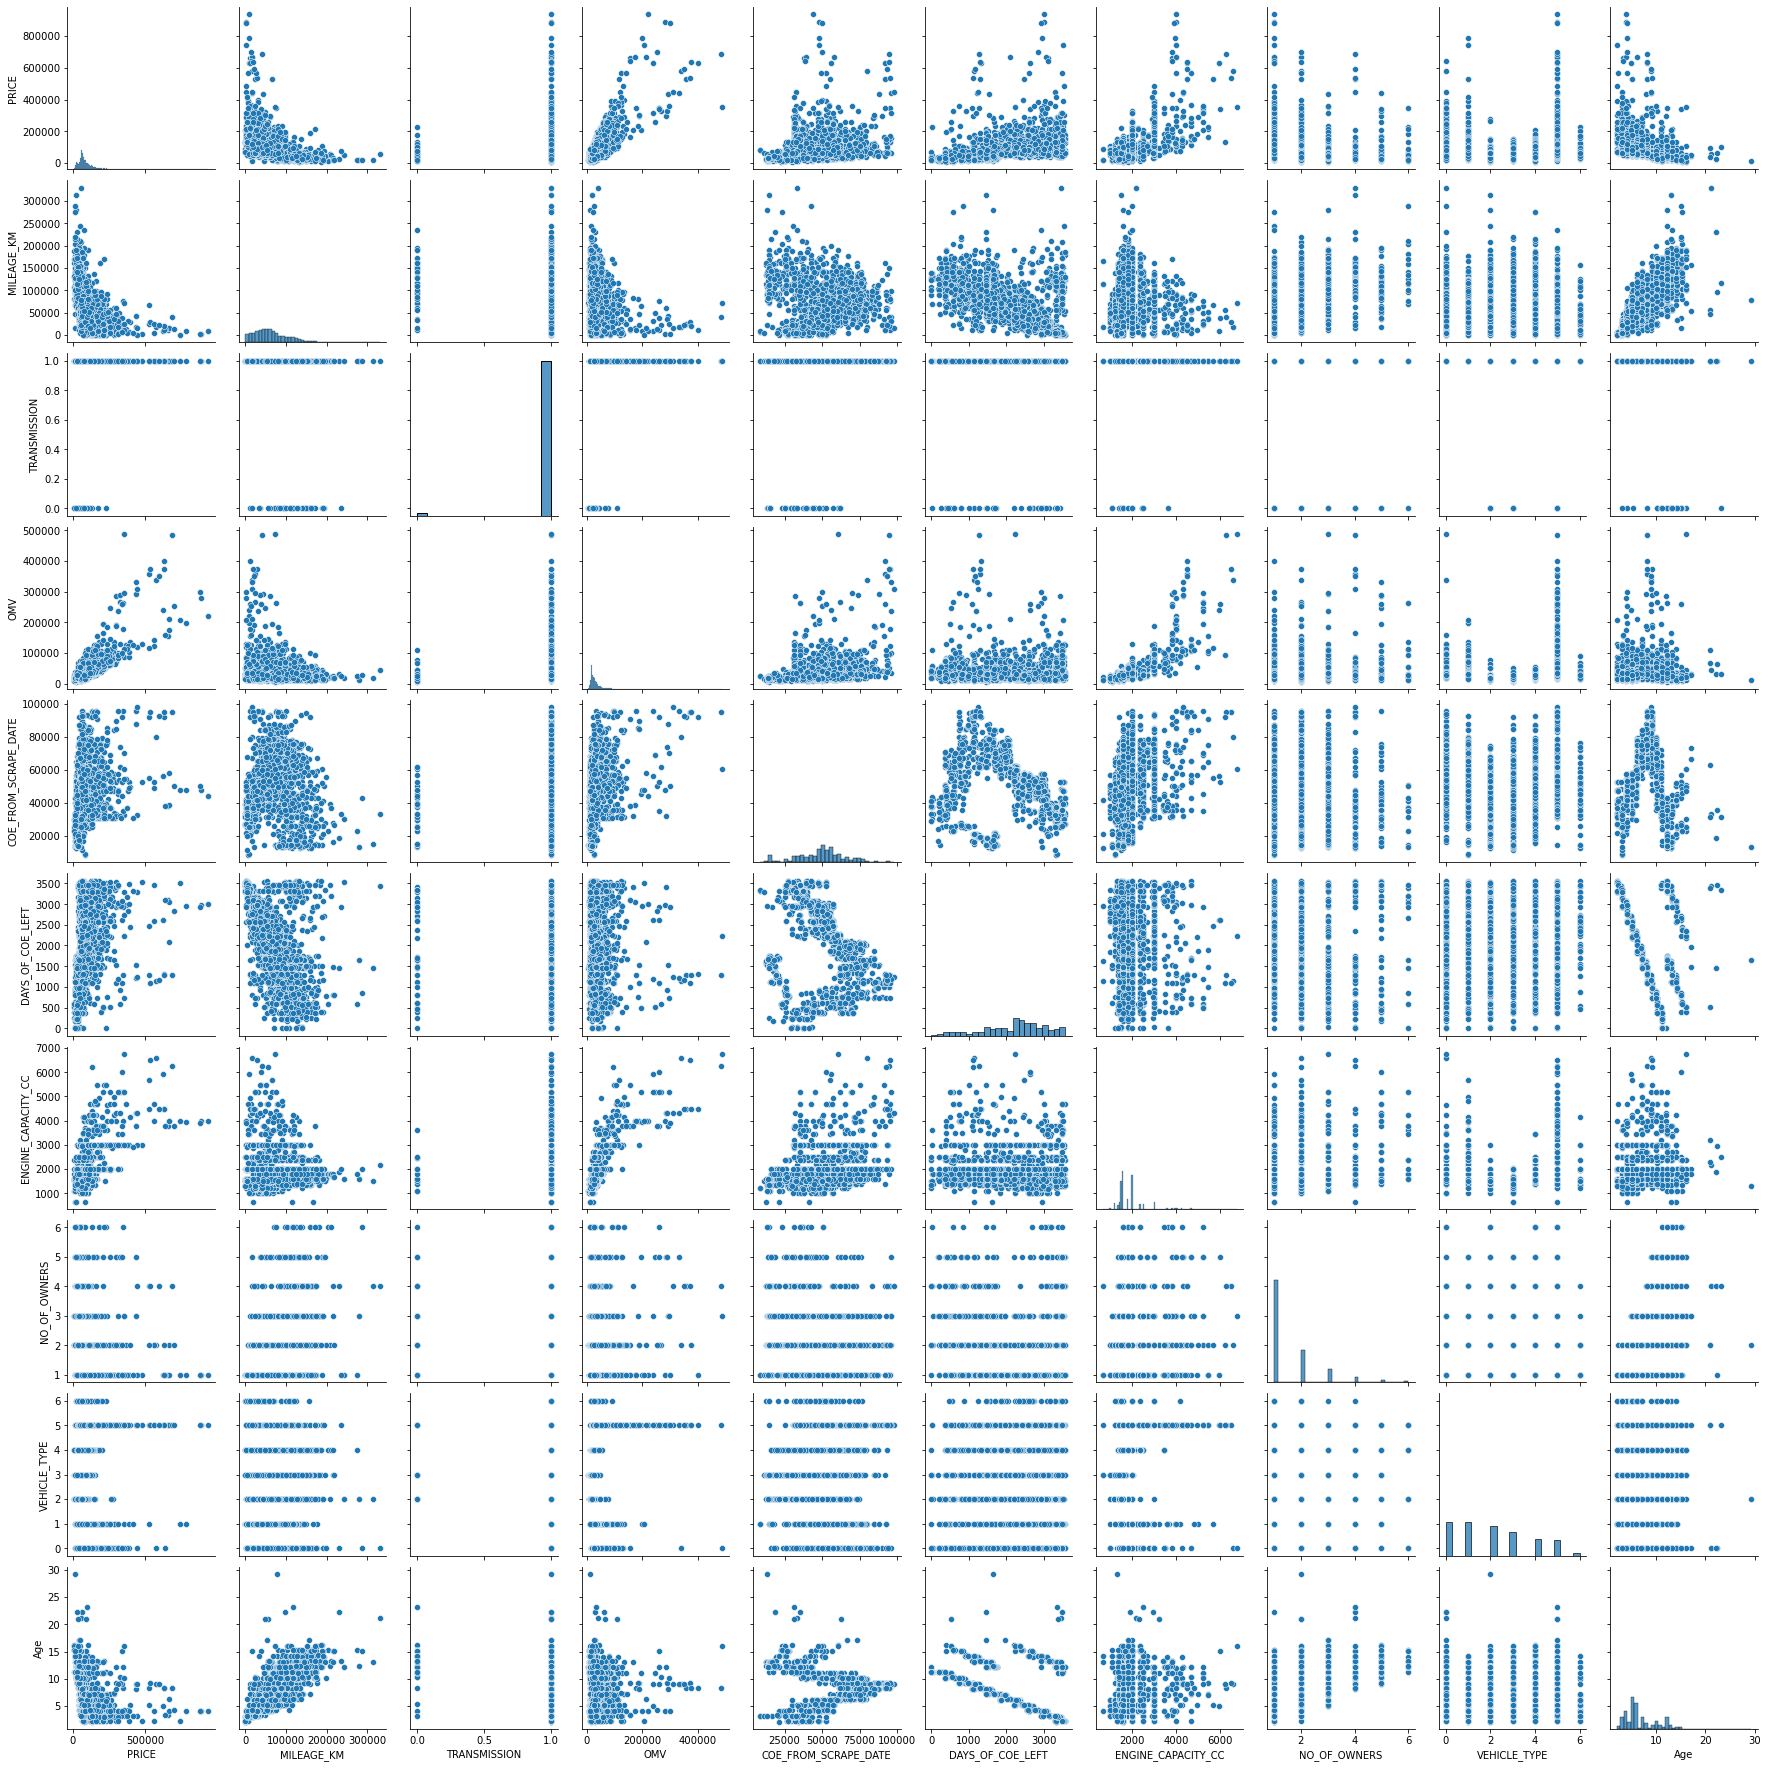

In [162]:
sns.pairplot(data_clean)

# 5. Modelling

<a id = "Modeling"></a>

In [163]:
price = pd.DataFrame(data_clean['PRICE'])

Intercept:	 [1421.28300683]
Coefficient:	 [[0.35921269]]


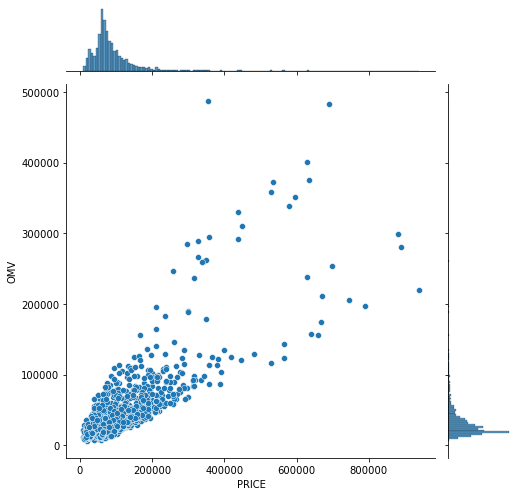

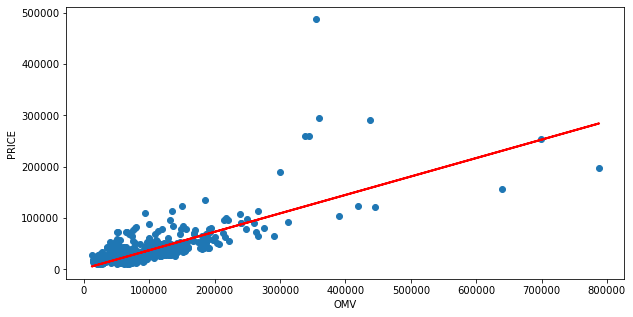

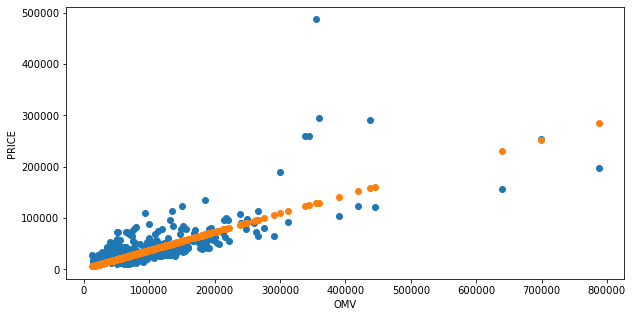

In [164]:
# PRICE AGAINST OMV
OMV = pd.DataFrame(data_clean['OMV'])
#join price and OMV
price_OMV = pd.concat([OMV,price], axis=1)
#plot joint  plot 
sns.jointplot(data = price_OMV, x='PRICE', y='OMV', height= 7)

# response variable : PRICE (y)
# predictor Feature : OMV   (x)

X_train, X_test, y_train, y_test = train_test_split(price, OMV,random_state = 2, train_size = 0.3)

#fit the linear reg model on the train dataset to predict price using omv
reg = LinearRegression().fit(X_train, y_train)

#find the coefficients of the model and plot the line
print("Intercept:\t", reg.intercept_)
print("Coefficient:\t", reg.coef_)

regline_x = X_train
regline_y = reg.intercept_ + reg.coef_ * X_train

# plot
f = plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 2)
plt.xlabel("OMV")
plt.ylabel("PRICE")
plt.show()

y_train_pred = reg.predict(X_train)

# scatterplot
f = plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred)
plt.xlabel("OMV")
plt.ylabel("PRICE")
plt.show()

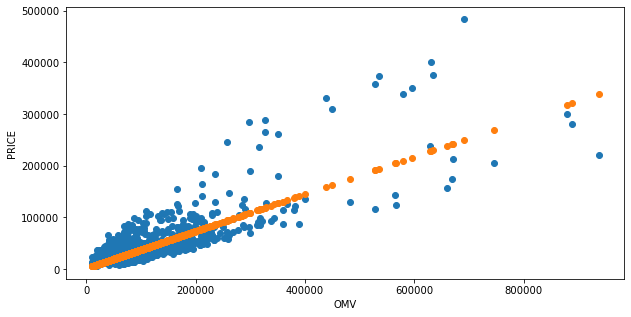

In [165]:
## now predicting on the test data
y_test_pred = reg.predict(X_test)

#plot test 
f = plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred)
plt.xlabel("OMV")
plt.ylabel("PRICE")
plt.show()

In [166]:
# compare train and test data
# Train Data
print("TRAIN DATA -")
rs_train = reg.score(X_train, y_train)
print("\tExplained Variance (R^2):\t", rs_train)
mse_train = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("\tMean Squared Error (MSE):\t", mse_train)

print()

# Test Data
print("TEST DATA -")
rs_test = reg.score(X_test, y_test)
print("\tExplained Variance (R^2):\t", rs_test)
mse_test = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
print("\tMean Squared Error (MSE):\t", mse_test)

TRAIN DATA -
	Explained Variance (R^2):	 0.5505607181580714
	Mean Squared Error (MSE):	 478316942.8108368

TEST DATA -
	Explained Variance (R^2):	 0.6656522281776913
	Mean Squared Error (MSE):	 467290290.9928797


In [167]:
# PRICE AGAINST ENGINE_CAPACITY_CC

Intercept:	 [1378.74113883]
Coefficient:	 [[0.00539516]]


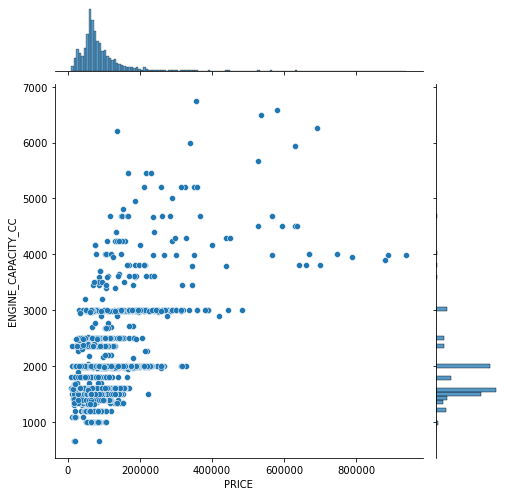

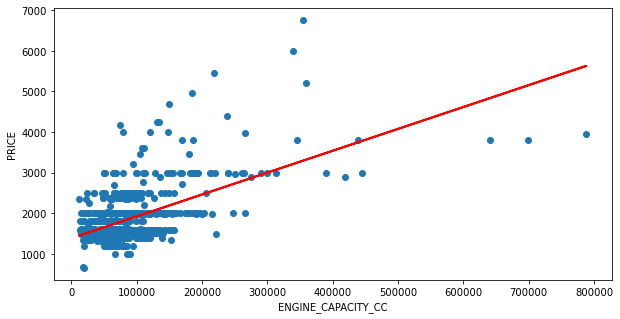

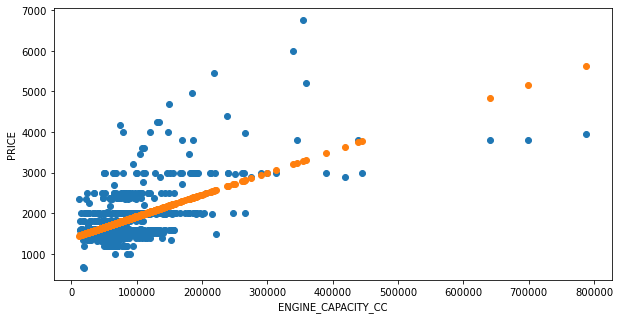

In [168]:
# PRICE AGAINST ENGINE_CAPACITY_CC
engine = pd.DataFrame(data_clean['ENGINE_CAPACITY_CC'])
#join price and ENGINE_CAPACITY_CC
price_engine = pd.concat([engine,price], axis=1)
#plot joint  plot 
sns.jointplot(data = price_engine, x='PRICE', y='ENGINE_CAPACITY_CC', height= 7)

# response variable : PRICE (y)
# predictor Feature : OMV   (x)

X_train, X_test, y_train, y_test = train_test_split(price, engine, random_state = 2, train_size = 0.3)

#fit the linear reg model on the train dataset to predict price using omv
reg = LinearRegression().fit(X_train, y_train)

#find the coefficients of the model and plot the line
print("Intercept:\t", reg.intercept_)
print("Coefficient:\t", reg.coef_)

regline_x = X_train
regline_y = reg.intercept_ + reg.coef_ * X_train

# plot
f = plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 2)
plt.xlabel("ENGINE_CAPACITY_CC")
plt.ylabel("PRICE")
plt.show()

y_train_pred = reg.predict(X_train)

# scatterplot
f = plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred)
plt.xlabel("ENGINE_CAPACITY_CC")
plt.ylabel("PRICE")
plt.show()

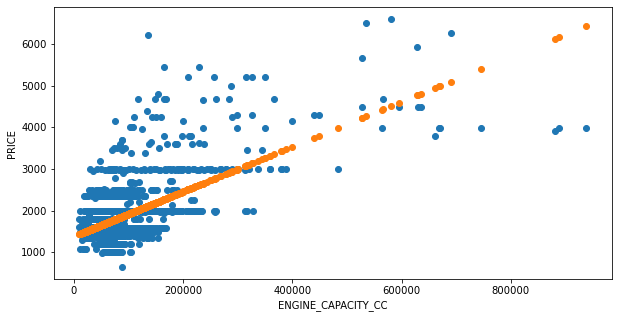

In [169]:
## now predicting on the test data
y_test_pred = reg.predict(X_test)

#plot test 
f = plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred)
plt.xlabel("ENGINE_CAPACITY_CC")
plt.ylabel("PRICE")
plt.show()

In [170]:
# compare train and test data
# Train Data
print("TRAIN DATA -")
rs_train = reg.score(X_train, y_train)
print("\tExplained Variance (R^2):\t", rs_train)
mse_train = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("\tMean Squared Error (MSE):\t", mse_train)

print()

# Test Data
print("TEST DATA -")
rs_test = reg.score(X_test, y_test)
print("\tExplained Variance (R^2):\t", rs_test)
mse_test = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
print("\tMean Squared Error (MSE):\t", mse_test)

TRAIN DATA -
	Explained Variance (R^2):	 0.33683594396985983
	Mean Squared Error (MSE):	 260229.88724021707

TEST DATA -
	Explained Variance (R^2):	 0.41115850286131583
	Mean Squared Error (MSE):	 276994.4199892459


In [171]:
# PRICE AGAINST MILEAGE_KM

Intercept:	 [88566.88308362]
Coefficient:	 [[-0.26825257]]


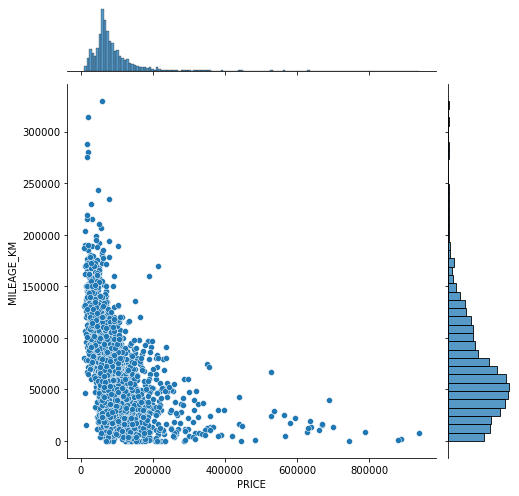

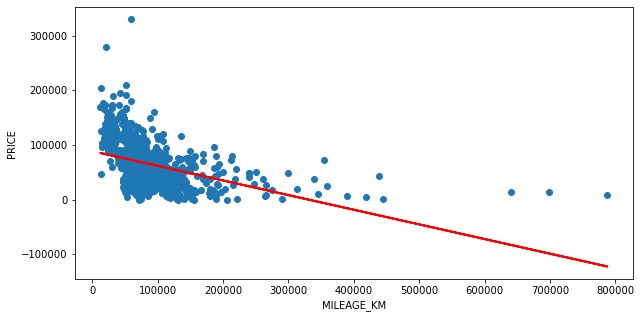

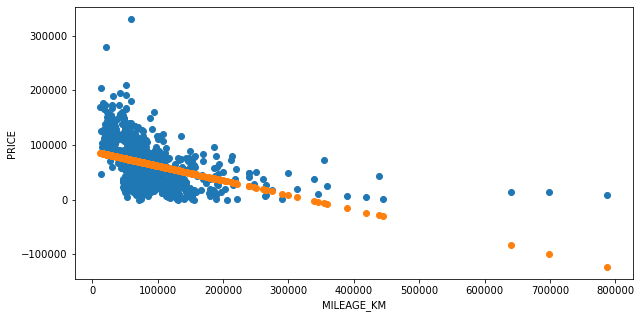

In [172]:
# PRICE AGAINST MILEAGE_KM
mileage = pd.DataFrame(data_clean['MILEAGE_KM'])
#join price and MILEAGE_KM
price_mileage = pd.concat([mileage,price], axis=1)
#plot joint  plot 
sns.jointplot(data = price_mileage, x='PRICE', y='MILEAGE_KM', height= 7)

# response variable : PRICE (y)
# predictor Feature : mileage   (x)

X_train, X_test, y_train, y_test = train_test_split(price, mileage,random_state = 2, train_size = 0.3)

#fit the linear reg model on the train dataset to predict price using omv
reg = LinearRegression().fit(X_train, y_train)

#find the coefficients of the model and plot the line
print("Intercept:\t", reg.intercept_)
print("Coefficient:\t", reg.coef_)

regline_x = X_train
regline_y = reg.intercept_ + reg.coef_ * X_train

# plot
f = plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 2)
plt.xlabel("MILEAGE_KM")
plt.ylabel("PRICE")
plt.show()

y_train_pred = reg.predict(X_train)

# scatterplot
f = plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred)
plt.xlabel("MILEAGE_KM")
plt.ylabel("PRICE")
plt.show()

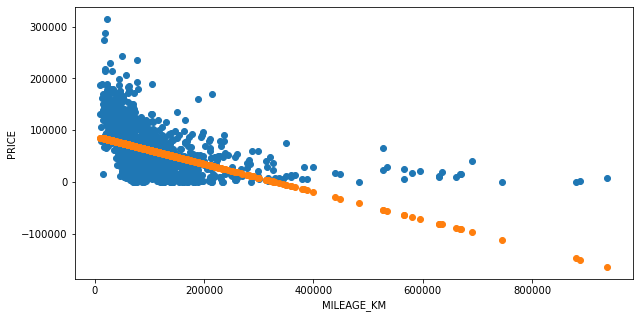

In [173]:
## now predicting on the test data
y_test_pred = reg.predict(X_test)

#plot test 
f = plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred)
plt.xlabel("MILEAGE_KM")
plt.ylabel("PRICE")
plt.show()

In [174]:
# compare train and test data
# Train Data
print("TRAIN DATA -")
rs_train = reg.score(X_train, y_train)
print("\tExplained Variance (R^2):\t", rs_train)
mse_train = np.mean(np.square(np.array(y_train) - np.array(y_train_pred)))
print("\tMean Squared Error (MSE):\t", mse_train)

print()

# Test Data
print("TEST DATA -")
rs_test = reg.score(X_test, y_test)
print("\tExplained Variance (R^2):\t", rs_test)
mse_test = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
print("\tMean Squared Error (MSE):\t", mse_test)

TRAIN DATA -
	Explained Variance (R^2):	 0.18175986469810423
	Mean Squared Error (MSE):	 1471015229.825622

TEST DATA -
	Explained Variance (R^2):	 0.15117554682957735
	Mean Squared Error (MSE):	 1549224629.9821103


In [175]:
# PRICE AGAINST MILEAGE_KM, OMV and ENGINE_CAPACITY_CC
x = data_clean[['MILEAGE_KM','OMV', 'ENGINE_CAPACITY_CC']]
y = data_clean['PRICE']
# response variable : PRICE (y)
# predictor Feature : MILEAGE_KM, OMV and ENGINE_CAPACITY_CC (x)
regr = LinearRegression()
regr.fit(x, y)
#find the coefficients of the model and plot the line
print("Intercept:\t", regr.intercept_)
print("Coefficient:\t", regr.coef_)

x = ssm.add_constant(x)
model = ssm.OLS(y,x).fit()
predictions = model.summary()
predictions

Intercept:	 64169.6011843756
Coefficient:	 [-0.59874498  1.52935481  7.3101828 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     2528.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:18:49   Log-Likelihood:                -31325.
No. Observations:                2612   AIC:                         6.266e+04
Df Residuals:                    2608   BIC:                         6.268e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.417e+04   2909.144     22.058      0.000    5.85e+04    6.99e+04
MILEAGE_KM            -0.5987      0.018    -32.808      0.000      -0.635      -0.563
OMV                    1.5294      0.035     43.519      0.000       1.460       1.598
ENGINE_CAPACITY_CC     7.3102      1.882      3.884      0.000       3.619      11.001
==============================================================================
Omnibus:                     1873.572   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179817.939
Skew:                           2.620   Prob(JB):                         0.00
Kurtosis:                      43.308   Cond. No.                     3.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>TRAIN DATA - __OMV__ <br>
>>    Explained Variance (R^2):	 __0.6340441025578882__<br>
>>    Mean Squared Error (MSE):	 __510172583.5769516__<br>

>TEST DATA - __OMV__ <br>
>>	Explained Variance (R^2):	 __0.6532419563023861__<br>
>>	Mean Squared Error (MSE):	 __340476484.8437279__<br>
<hr>

>TRAIN DATA - __ENGINE_CAPACITY_CC__ <br>
>>	Explained Variance (R^2):	 __0.4049222561010978__<br>
>>	Mean Squared Error (MSE):	 __259998.7720517298__<br>

>TEST DATA - __ENGINE_CAPACITY_CC__ <br>
>>	Explained Variance (R^2):	 __0.3521037325743007__<br>
>>	Mean Squared Error (MSE):	 __311254.15651794587__<br>
<hr>

>TRAIN DATA - __MILEAGE_KM__ <br>
>>	Explained Variance (R^2):	 __0.18175986469810423__<br>
>>	Mean Squared Error (MSE):	 __1471015229.825622__<br>

>TEST DATA - __MILEAGE_KM__ <br>
>>	Explained Variance (R^2):	 __0.15117554682957735__<br>
>>	Mean Squared Error (MSE):	 __1549224629.9821103__<br>

> Given the R^2 values and Mean Squared Error we know a few things
>>__Explained Variance (R^2)__
Explained variation measures the proportion to which a mathematical model accounts for the variation of a given data set. The greater the variance explained, the better the variable is at predicting Price, in general. <br>
>>__Mean Squared Error (MSE)__
MSE of an estimator measures the average of the squares of the errors (difference between the estimated values and the actual value). The lower the Mean Squared Error, the more accurate the prediction, hence the better the variable is at predicting Price, in general.

>From this description, we can say that,
> 1) __OMV__ is significatly better at predicting the price, followed by __ENGINE_CAPACITY_CC__, and __MILEAGE_KM__. <br> <br>
> 2) Even though __ENGINE_CAPACITY_CC__ is not as good as predicting the Price, it is obvious that it is definitely more accurate than the other values. <br> <br>
> 3) __OVERALL__ , a combination of these features will be able to provide a better acurracy. As observed from the Statsmodels generated.

__Regularization__

>__Ridge regression__: It is also called Linear least sqaures with L2 regularization.[adds penalty equivalent to square of the magnitude of coefficients]
Ridge regression loss fuction = LS Obj + α * (sum of square of coefficients)
alpha is parameter we need to choose to fit and predict. 

>if alpha is zero. loss function = OLS so that is linear regression
If alpha is small that can cause overfitting
If alpha is big that can cause underfitting. 

[Ridge Regression Source](https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/)

[Sklearn Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [176]:

# Ridge
# PRICE AGAINST MILEAGE_KM
mileage = pd.DataFrame(data_clean['MILEAGE_KM'])

# response variable : PRICE (y)
# predictor Feature : mileage   (x)

x_train, x_test, y_train, y_test = train_test_split(price, mileage, random_state = 2, train_size = 0.3)

ridge = Ridge(alpha = 0.01, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.15222964094622815


In [185]:
# Ridge
# PRICE AGAINST OMV
OMV = pd.DataFrame(data_clean['OMV'])

# response variable : PRICE (y)
# predictor Feature : OMV   (x)

x_train, x_test, y_train, y_test = train_test_split(price, OMV, random_state = 2, train_size = 0.3)

ridge = Ridge(alpha = 0.01, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.6650126568422088


In [186]:
# Ridge
# PRICE AGAINST ENGINE_CAPACITY_CC
engine = pd.DataFrame(data_clean['ENGINE_CAPACITY_CC'])

# response variable : PRICE (y)
# predictor Feature : ENGINE_CAPACITY_CC   (x)

x_train, x_test, y_train, y_test = train_test_split(price, engine, random_state = 2, train_size = 0.3)

ridge = Ridge(alpha = 0.01, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.4110735033273819


In [187]:
x = data_clean[['MILEAGE_KM','OMV', 'ENGINE_CAPACITY_CC']]

# response variable : PRICE (y)
# predictor Feature : ALL   (x)

x_train,x_test,y_train,y_test = train_test_split(x, price,random_state = 3, test_size = 0.3)

ridge = Ridge(alpha = 0.01, normalize = False)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.7081429063488454


>__OVERALL__, it is observed that the overall ridge score is slightly less accurate as compared to linear regressions.

>MILEAGE_KM <br>
>__Ridge score__:  0.15222964094622815
<hr>

>OMV<br>
>__Ridge score__:  0.6552876018523427
<hr>

>ENGINE_CAPACITY_CC<br>
>__Ridge score__:  0.40736727048844046

>OVERALL <br>
>__Ridge score__:  0.7030596456071049

__Regularization 2__

>Lasso regression: It is also called the L1 regularization.[adds penalty equivalent to absolute value of the magnitude of coefficients]
Lasso regression loss fuction = LS Obj + α * (sum of absolute value of coefficients)

>It can be used to select important features of the data. Because features whose values are not shrinked to zero, is chosen by lasso regression.

[Lasso Regression Source](https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/)

[Sklearn Lasso](https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Lasso.html)

In [180]:

x = pd.DataFrame(data_clean['MILEAGE_KM'])
x_train,x_test,y_train,y_test = train_test_split(x, price,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.15153374840561395
Lasso coefficients:  [-0.74743942]


In [181]:
x = pd.DataFrame(data_clean['OMV'])
x_train,x_test,y_train,y_test = train_test_split(x, price,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.6082455021500625
Lasso coefficients:  [1.69304646]


In [182]:
x = pd.DataFrame(data_clean['ENGINE_CAPACITY_CC'])
x_train,x_test,y_train,y_test = train_test_split(x, price,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.3898708806762978
Lasso coefficients:  [73.15664169]


In [183]:
x = np.array(data_clean.loc[:,['MILEAGE_KM','OMV', 'ENGINE_CAPACITY_CC']])
x_train,x_test,y_train,y_test = train_test_split(x, price,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.7081379159480854
Lasso coefficients:  [-0.59972405  1.54092887  5.21122281]


>__OVERALL__, similar score to ridge score, therefore linear regression is definitely more accurate,

>MILEAGE_KM<br>
>__Lasso score__:  0.15153374840561395
<hr>

>OMV<br>
>__Lasso score__:  0.6082455021500625
<hr>

>ENGINE_CAPACITY_CC<br>
>__Lasso score__:  0.3898708806762978
<hr>

>OVERALL <br>
>__Lasso score__:  0.7962614006890055

>Utimately it seems that the linear regression model has the better accuracy compare to the rest.

>Therefore we should pick linear regression to obtain a benchmark of a cars pricing.

>Imagine trying to pick a second hand car. <br>
>Try this out below!

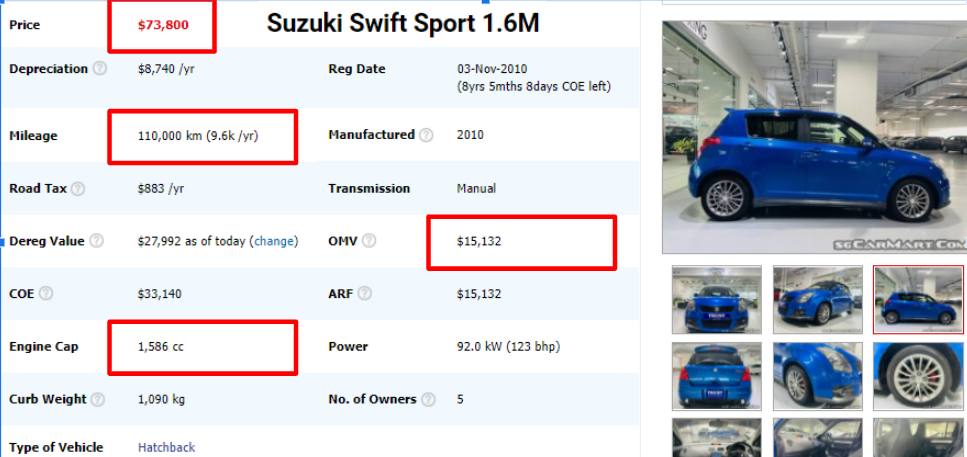

>After predicted the value, we can see how overvalued the car is listed on the website.

In [189]:
MILEAGE    = int(input("Enter the Mileage(in KM) of the car: "))
CC         = int(input("Enter the Engine Capcity(in CC ex.[2L / 2000CC]) of the car: "))
OMV        = int(input("Enter the OMV($) of the car: "))

predicted = regr.predict([[MILEAGE, OMV, CC]])
print('The predicted price of the car : $', predicted)

Enter the Mileage(in KM) of the car: 110000
Enter the Engine Capcity(in CC ex.[2L / 2000CC]) of the car: 1586
Enter the OMV($) of the car: 15132
The predicted price of the car : $ [33043.80078699]


# 6. Conclusion

<a id = "Conclusion"></a>
<hr>

> Our model can solve the problem of finding out how much a car should be valued based off of its features. Giving the user some insight of how overvalued or undervalued a car is right now. 
>But the models drawback comes from its low accuracy. This might affect how "viable" it is to use the value.

>To combat this accuracy issue,the team has came up with suggestions and reccommendations.
>> 1) Having Outliers can be a problem. Due to the drastic difference in price of cars, this might have affected the accuracy of the model negatively. An improvement that can be made is to filter out the cars based of their "type" eg. Luxury / Sports Car / Consumer / Hyper Car. And do regression techinques on the individual "type"

>> 2) Popularity in cars also might be an issue, as time changes popularity of certain cars might change as well. A good example is how vintage cars manage to stay popular. An improvment can be made by finding out how popular a car is, however this data is hard to come by.

>> 3) Brands. Brands like Ferrari's and Mclaren's are definitely different from your every day Toyota. Brands can give us a quick glance on how it can affect price. 

>> 4) Size of data. Due to the small sample size of our data [2600 sameples]. We might not have generated the best model for predicting the price. The easiest improvment that could be made is to scrape more data off other second hand vehicle websites.